# Big Data - TP #2

El objetivo de este TP es hacer una limpieza y análisis de la EPH. Asimismo, predecir si una persona es o no pobre
utilizando datos distintos al ingreso usando las metodologías vistas en clase.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Parte I: Analizando la base

In [197]:
# Abrimos el archivo y vemos las primeras cinco filas
eph_indiv = pd.read_excel("C:/Users/aleja/OneDrive/Documentos/Big Data/big-data-tp2/datasets/usu_individual_T123.xlsx")
eph_indiv.head(5)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
0,TQRMNORVWHLMKOCDEOHCH00720228,2023,1,1,5,0,44,N,91,112,...,10.0,9,79700.0,6,6.0,5,NaN,7.0,5,133
1,TQRMNOPSTHKMKPCDEOHCH00781447,2023,1,1,1,1,44,N,91,190,...,6.0,5,180000.0,9,10.0,9,NaN,10.0,9,200
2,TQRMNOQSXHMOKRCDEOHCH00803177,2023,1,1,1,1,44,N,91,134,...,8.0,8,145000.0,9,9.0,8,NaN,9.0,8,140
3,TQRMNOQSXHMOKRCDEOHCH00803177,2023,1,1,2,1,44,N,91,134,...,8.0,8,145000.0,9,9.0,8,NaN,9.0,8,140
4,TQRMNOQYTHMNKSCDEOHCH00803178,2023,1,1,1,1,44,N,91,120,...,12.0,12,0.0,12,12.0,12,NaN,12.0,12,0


In [198]:
#Resumen de la base de datos
eph_indiv.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48638 entries, 0 to 48637
Data columns (total 177 columns):
 #    Column      Dtype  
---   ------      -----  
 0    CODUSU      object 
 1    ANO4        int64  
 2    TRIMESTRE   int64  
 3    NRO_HOGAR   int64  
 4    COMPONENTE  int64  
 5    H15         int64  
 6    REGION      int64  
 7    MAS_500     object 
 8    AGLOMERADO  int64  
 9    PONDERA     int64  
 10   CH03        int64  
 11   CH04        int64  
 12   CH05        object 
 13   CH06        int64  
 14   CH07        int64  
 15   CH08        float64
 16   CH09        int64  
 17   CH10        int64  
 18   CH11        int64  
 19   CH12        int64  
 20   CH13        int64  
 21   CH14        float64
 22   CH15        int64  
 23   CH15_COD    float64
 24   CH16        int64  
 25   CH16_COD    float64
 26   NIVEL_ED    int64  
 27   ESTADO      int64  
 28   CAT_OCUP    int64  
 29   CAT_INAC    int64  
 30   IMPUTA      float64
 31   PP02C1      int64  
 32   

In [199]:
#2a) Eliminen todas las observaciones que no corresponden a los aglomerados de CABA o Gran Buenos Aires.

#El siguiente código toma el índice de aquellas observaciones para las que el aglomerado no es ni CABA (32) ni Gran Buenos Aires (33), y elimina las filas que cumplen esa condición. 

eph_indiv= eph_indiv.drop(eph_indiv[(eph_indiv["AGLOMERADO"] != 32) & (eph_indiv["AGLOMERADO"] != 33)].index)

#Para comprobar que funcionó, presentamos los valores que toma la variable "AGLOMERADO":

unique=eph_indiv["AGLOMERADO"].unique() 
print(unique) #Vemos que ahora "Aglomerado" solo toma los valores 32 y 33

[33 32]


In [200]:
#2b) Si hay observaciones con valores que no tienen sentido, descartarlas

#Para identificar aquellas variables que toman valores sin sentido, utilizamos el siguiente comando:
# (Las funciones nanmin y nanmax calculan los valores mínimos y máximos de cada columna sin incluir los valores faltantes, ya que de lo contrario para las variables con valores faltantes "nan" aparece como el valor mínimo y máximo)

for column in eph_indiv.columns:
    try:
        print(column, np.nanmin(eph_indiv[column]), np.nanmax(eph_indiv[column]))
    except:
        print(column)
        
    

CODUSU TQRMNOPPQHJNOPCDEIJAH00802435 TQUMNORTQHLMNUCDEIJAH00780261
ANO4 2023 2023
TRIMESTRE 1 1
NRO_HOGAR 1 51
COMPONENTE 1 13
H15 0 2
REGION 1 1
MAS_500 S S
AGLOMERADO 32 33
PONDERA 45 8423
CH03 1 10
CH04 1 2
CH05 1900-01-01 00:00:00 2023-03-02 00:00:00
CH06 -1 99
CH07 1 9
CH08 1.0 12.0
CH09 0 9
CH10 0 9
CH11 0 9
CH12 0 99
CH13 0 9
CH14 0.0 99.0
CH15 0 9
CH15_COD 10.0 449.0
CH16 0 9
CH16_COD 14.0 410.0
NIVEL_ED 1 7
ESTADO 0 4
CAT_OCUP 0 9
CAT_INAC 0 7
IMPUTA 1.0 1.0
PP02C1 0 2
PP02C2 0 2
PP02C3 0 2
PP02C4 0 2
PP02C5 0 2
PP02C6 0 2
PP02C7 0 2
PP02C8 0 2
PP02E 0 5
PP02H 0 2
PP02I 0 2
PP03C 0.0 2.0
PP03D 0.0 6.0
PP3E_TOT 0.0 999.0
PP3F_TOT 0.0 999.0
PP03G 1.0 9.0
PP03H 0.0 9.0
PP03I 1.0 9.0
PP03J 1.0 9.0
INTENSI 1.0 4.0
PP04A 1.0 9.0
PP04B_COD 1.0 9999.0
PP04B1 1.0 2.0
PP04B2 0.0 6.0
PP04B3_MES 0.0 99.0
PP04B3_ANO 0.0 99.0
PP04B3_DIA 0.0 99.0
PP04C 0.0 99.0
PP04C99 0.0 9.0
PP04D_COD 1001.0 99999.0
PP04G 0.0 99.0
PP05B2_MES 0.0 99.0
PP05B2_ANO 0.0 99.0
PP05B2_DIA 0.0 99.0
PP05C_1 0.0 9.0


C:\Users\aleja\AppData\Local\Temp\ipykernel_11420\1849983425.py:8: RuntimeWarning: All-NaN axis encountered
  print(column, np.nanmin(eph_indiv[column]), np.nanmax(eph_indiv[column]))


In [201]:
#Eliminamos observaciones con edades (CH06) menores a 0:
eph_indiv= eph_indiv.drop(eph_indiv[(eph_indiv["CH06"] <0)].index)

#Las variables de ingreso IPCF e ITF no toman valores negativos.

#Reemplazamos los 9, 99, 999, 9999, 99999 por "nan" en aquellas variables en las que dichos codigos corresponden a valores faltantes.

missing_codes= [9, 99, 999, 9999, 99999]

for i in missing_codes:
    for column in eph_indiv.columns:
        if column!="CH06":
            try:
                if np.nanmax(eph_indiv[column])==i:
                    eph_indiv[column]=eph_indiv[column].replace(i, np.nan)
            except:
                print(column, eph_indiv[column].dtype) 


PP09A_ESP object
PP09C_ESP object
PP09A_ESP object
PP09C_ESP object
PP09A_ESP object
PP09C_ESP object
PP09A_ESP object
PP09C_ESP object
PP09A_ESP object
PP09C_ESP object


C:\Users\aleja\AppData\Local\Temp\ipykernel_11420\570084435.py:14: RuntimeWarning: All-NaN axis encountered
  if np.nanmax(eph_indiv[column])==i:


In [202]:
#Verificamos que se haya filtrado:

for column in eph_indiv.columns:
    try:
        print(column, np.nanmin(eph_indiv[column]), np.nanmax(eph_indiv[column]))
    except:
        print(column)

CODUSU TQRMNOPPQHJNOPCDEIJAH00802435 TQUMNORTQHLMNUCDEIJAH00780261
ANO4 2023 2023
TRIMESTRE 1 1
NRO_HOGAR 1 51
COMPONENTE 1 13
H15 0 2
REGION 1 1
MAS_500 S S
AGLOMERADO 32 33
PONDERA 45 8423
CH03 1 10
CH04 1 2
CH05 1900-01-01 00:00:00 2022-03-18 00:00:00
CH06 1 99
CH07 1.0 5.0
CH08 1.0 12.0
CH09 1.0 3.0
CH10 0.0 3.0
CH11 0.0 2.0
CH12 0.0 9.0
CH13 0.0 2.0
CH14 0.0 98.0
CH15 1.0 5.0
CH15_COD 10.0 449.0
CH16 0.0 6.0
CH16_COD 14.0 410.0
NIVEL_ED 1 7
ESTADO 0 4
CAT_OCUP 0.0 4.0
CAT_INAC 0 7
IMPUTA 1.0 1.0
PP02C1 0 2
PP02C2 0 2
PP02C3 0 2
PP02C4 0 2
PP02C5 0 2
PP02C6 0 2
PP02C7 0 2
PP02C8 0 2
PP02E 0 5
PP02H 0 2
PP02I 0 2
PP03C 0.0 2.0
PP03D 0.0 6.0
PP3E_TOT 0.0 168.0
PP3F_TOT 0.0 56.0
PP03G 1.0 2.0
PP03H 0.0 3.0
PP03I 1.0 2.0
PP03J 1.0 2.0
INTENSI 1.0 4.0
PP04A 1.0 3.0
PP04B_COD 1.0 9900.0
PP04B1 1.0 2.0
PP04B2 0.0 6.0
PP04B3_MES 0.0 11.0
PP04B3_ANO 0.0 40.0
PP04B3_DIA 0.0 30.0
PP04C 0.0 12.0
PP04C99 0.0 3.0
PP04D_COD 1001.0 99998.0
PP04G 0.0 10.0
PP05B2_MES 0.0 6.0
PP05B2_ANO 0.0 10.0
PP05

C:\Users\aleja\AppData\Local\Temp\ipykernel_11420\2269627186.py:5: RuntimeWarning: All-NaN axis encountered
  print(column, np.nanmin(eph_indiv[column]), np.nanmax(eph_indiv[column]))


Mujer    51.961432
Varón    48.038568
Name: gender, dtype: float64


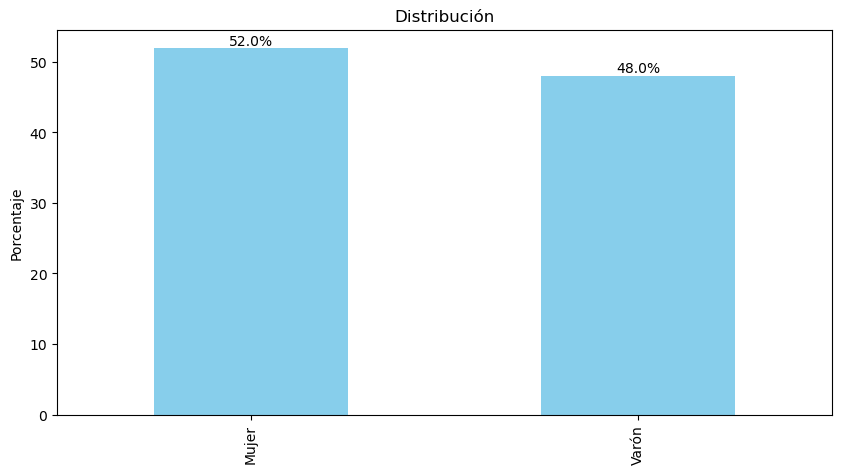

In [203]:
#2c) Gráfico de barras mostrando la composición por sexo
eph_indiv['gender'] = eph_indiv['CH04'].map({1: 'Varón', 2: 'Mujer'})
gender_counts = eph_indiv['gender'].value_counts(normalize=True) * 100
print(gender_counts) # Para conocer los porcentajes

# Gráfico de barras
barplot = plt.figure(figsize = (10, 5))
ax = gender_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución')
plt.ylabel('Porcentaje')

# Add percentage labels on top of the bars
for i, v in enumerate(gender_counts):
    ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.show()

              CH04         CH07         CH08     NIVEL_ED       ESTADO  \
count  7571.000000  7567.000000  7571.000000  7571.000000  7571.000000   
mean      1.519614     3.400687     2.222824     3.780346     2.141065   
std       0.499648     1.665733     1.946005     1.733184     1.144128   
min       1.000000     1.000000     1.000000     1.000000     0.000000   
25%       1.000000     2.000000     1.000000     3.000000     1.000000   
50%       2.000000     4.000000     1.000000     4.000000     2.000000   
75%       2.000000     5.000000     4.000000     5.000000     3.000000   
max       2.000000     5.000000    12.000000     7.000000     4.000000   

          CAT_INAC          IPCF  
count  7571.000000  7.571000e+03  
mean      1.423458  4.772044e+04  
std       1.810158  9.275807e+04  
min       0.000000  0.000000e+00  
25%       0.000000  0.000000e+00  
50%       0.000000  2.014286e+04  
75%       3.000000  6.500000e+04  
max       7.000000  2.198000e+06  


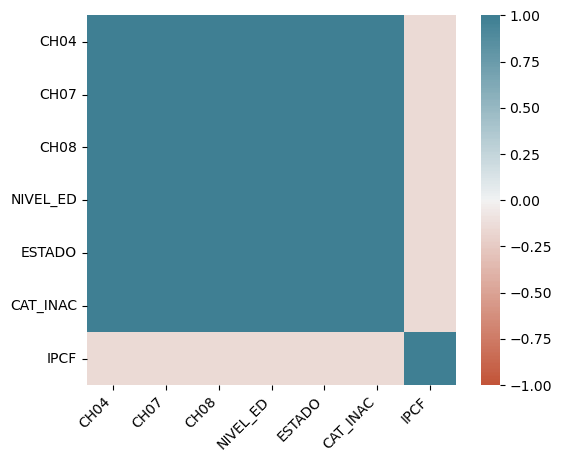

In [204]:
#2d) Matriz de correlación con las siguientes variables
covars = eph_indiv[['CH04', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']].describe()
print(covars) #Breve descripción de las variables

cmap = sns.diverging_palette(20, 220, n=200)

# Heatmap
ax = sns.heatmap(
    covars.corr(),  # Use .corr() to get the correlation matrix
    vmin=-1, vmax=1,
    center=0,
    cmap=cmap,
    square=True
)

# Customize
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

In [205]:
#2e) Calcular a los desocupados, inactivos y la media del Ingreso Per Capita Familiar segun estado (ocupado, desocupado, inactivo)

ocupados = (eph_indiv["ESTADO"] == 1).sum()
print("Número de ocupados en la muestra:" + str(ocupados))
desocupados=(eph_indiv["ESTADO"] == 2).sum()
print("Número de desocupados en la muestra:" + str(desocupados))
inactivos = (eph_indiv["ESTADO"] == 3).sum()
print("Número de inactivos en la muestra:" + str(inactivos))


#Para calcular el ingreso per capita para cada grupo, usamos la función loc, ya que necesitamos seleccionar una columna en particular para aquellas filas que cumplen cierta condición.

ingreso_ipcf_ocupados= eph_indiv.loc[eph_indiv["ESTADO"] == 1, "IPCF"].mean()
print("La media del IPCF para los ocupados es:" + str(ingreso_ipcf_ocupados))

ingreso_ipcf_desocupados= eph_indiv.loc[eph_indiv["ESTADO"] == 2, "IPCF"].mean()
print("La media del IPCF para los desocupados es:" + str(ingreso_ipcf_desocupados))

ingreso_ipcf_inactivos= eph_indiv.loc[eph_indiv["ESTADO"] == 3, "IPCF"].mean()
print("La media del IPCF para los inactivos es:" + str(ingreso_ipcf_inactivos))


Número de ocupados en la muestra:3523
Número de desocupados en la muestra:286
Número de inactivos en la muestra:2837
La media del IPCF para los ocupados es:59579.44291512915
La media del IPCF para los desocupados es:25536.022202797205
La media del IPCF para los inactivos es:40067.99605216778


In [206]:
#2f) 

#Abrimos el archivo "tabla adulto equiv.xlsx"

adulto = pd.read_excel("C:/Users/aleja/OneDrive/Documentos/Big Data/big-data-tp2/datasets/tabla_adulto_equiv.xlsx")
display(adulto)



,"Tabla de equivalencias de necesidades energéticas. Unidades de adulto equivalente, según sexo y edad",Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,Edad,Mujeres,Varones
3,NaN,NaN,NaN
4,Menor de 1 año,0.35,0.35
5,1año,0.37,0.37
6,2 años,0.46,0.46
7,3 años,0.51,0.51
8,4 años,0.55,0.55
9,5 años,0.6,0.6


In [207]:
#Acomodamos la base:

adulto=adulto[4:27]
adulto["Edad"]=adulto["Tabla de equivalencias de necesidades energéticas. Unidades de adulto equivalente, según sexo y edad"]
adulto["2"]=adulto["Unnamed: 1"]
adulto["1"]=adulto["Unnamed: 2"]
adulto= adulto[["Edad", "2", "1"]]
display(adulto)

adulto["Edad"]=adulto["Edad"].str.replace("años", "").str.replace("año", "").str.replace(" ", "").str.replace("a", "")
adulto = adulto.set_index("Edad")


display(adulto)

,Edad,2,1
4,Menor de 1 año,0.35,0.35
5,1año,0.37,0.37
6,2 años,0.46,0.46
7,3 años,0.51,0.51
8,4 años,0.55,0.55
9,5 años,0.6,0.6
10,6 años,0.64,0.64
11,7 años,0.66,0.66
12,8 años,0.68,0.68
13,9 años,0.69,0.69


,2,1
Edad,,
Menorde1,0.35,0.35
1,0.37,0.37
2,0.46,0.46
3,0.51,0.51
4,0.55,0.55
5,0.6,0.6
6,0.64,0.64
7,0.66,0.66
8,0.68,0.68


In [208]:
#Chequeamos los valores que toman las variables de genero (CH04) y edad (CH06) en la base eph_indiv:

print(eph_indiv["CH04"].unique())
print(eph_indiv["CH06"].unique())

[2 1]
[65 70 36 28  9 59 55 18 44 45 10  3 62 67 53 51 29 39 24  6 34  4  1 52
 50 31 23 14  5 61 25 21 46 16 22 42 38 19 12 75 17 27 49 77 66  2 87 37
 48 78 74 90 13 71  7 41 47 33 63 72 35 86 92 82 58 69 30 57 85 80 79 68
 83 54 26 11 40 60 32 73 64  8 56 43 99 15 81 20 89 84 76 97 91 88 93 94
 95 96]


In [209]:
def equivalencia(edad, genero):
    if edad <18: #No hay observaciones con edades menor a 1, asi que la aquivalencia para las personas de menos de 1 año de edad no es un problema en este caso
        equiv= adulto.at[str(edad),str(genero)]
    if edad>=18 and edad <30:
        equiv= adulto.at["1829", str(genero)]
    if edad>=30 and edad <46:
        equiv= adulto.at["3045", str(genero)]   
    if edad>=46 and edad <61:
        equiv= adulto.at["4660", str(genero)]   
    if edad>=61 and edad <76: #No queda claro en la tabla, pero asumimos que las personas de 75 están incluidas en esta categoría
        equiv= adulto.at["6175", str(genero)]    
    if edad>=76:
        equiv= adulto.at["másde75", str(genero)] 
    return(equiv)  

eph_indiv["adulto_equiv"]= eph_indiv.apply(lambda x: equivalencia(x.CH06, x.CH04), axis=1)

In [210]:
#Visualizamos los resultados:
display(eph_indiv[["CH04", "CH06", "adulto_equiv"]])

,CH04,CH06,adulto_equiv
102,2,65,0.67
103,1,70,0.83
104,1,36,1.00
105,2,28,0.76
106,2,9,0.69
...,...,...,...
48597,2,77,0.63
48598,2,45,0.77
48599,1,17,1.04
48600,1,26,1.02


In [211]:
suma=eph_indiv.groupby(by=["CODUSU", "NRO_HOGAR"]).agg({"adulto_equiv":"sum"})

In [212]:
display(suma)

,,adulto_equiv
CODUSU,NRO_HOGAR,
TQRMNOPPQHJNOPCDEIJAH00802435,1,3.54
TQRMNOPPQHKMQRCDEIJAH00780809,1,4.48
TQRMNOPPQHLNKTCDEIIAD00780107,1,2.14
TQRMNOPPQHLOKTCDEIJAH00719666,1,1.00
TQRMNOPPQHMKLSCDEIIAD00801791,1,1.41
...,...,...
TQTMNORTQHLMNUCDEIJAH00793701,1,3.58
TQTMNORTYHJOPMCDEIJAH00794674,1,1.78
TQUMNOQQUHKNRUCDEIJAH00780938,1,3.07


In [213]:
suma["ad_equiv_hogar"]=suma["adulto_equiv"]
suma = suma.drop('adulto_equiv', axis=1)
display(suma)

,,ad_equiv_hogar
CODUSU,NRO_HOGAR,
TQRMNOPPQHJNOPCDEIJAH00802435,1,3.54
TQRMNOPPQHKMQRCDEIJAH00780809,1,4.48
TQRMNOPPQHLNKTCDEIIAD00780107,1,2.14
TQRMNOPPQHLOKTCDEIJAH00719666,1,1.00
TQRMNOPPQHMKLSCDEIIAD00801791,1,1.41
...,...,...
TQTMNORTQHLMNUCDEIJAH00793701,1,3.58
TQTMNORTYHJOPMCDEIJAH00794674,1,1.78
TQUMNOQQUHKNRUCDEIJAH00780938,1,3.07


In [214]:
eph_merge=eph_indiv.merge(suma, on=['CODUSU','NRO_HOGAR'], how='left')

In [215]:
eph_merge

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,gender,adulto_equiv,ad_equiv_hogar
0,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,1,1,1,S,33,1545,...,5,NaN,5,5.0,NaN,6,2540,Mujer,0.67,1.50
1,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,2,1,1,S,33,1545,...,5,NaN,5,5.0,NaN,6,2540,Varón,0.83,1.50
2,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,1,1,1,S,33,8423,...,1,NaN,1,1.0,NaN,1,14082,Varón,1.00,2.45
3,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,2,1,1,S,33,8423,...,1,NaN,1,1.0,NaN,1,14082,Mujer,0.76,2.45
4,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,3,0,1,S,33,8423,...,1,NaN,1,1.0,NaN,1,14082,Mujer,0.69,2.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7566,TQRMNOQPTHKKRRCDEIJAH00780327,2023,1,1,1,1,1,S,33,1300,...,10,NaN,10,10.0,NaN,10,1516,Mujer,0.63,0.63
7567,TQRMNOPTXHKORSCDEIJAH00780269,2023,1,1,1,1,1,S,33,1193,...,12,NaN,12,12.0,NaN,12,0,Mujer,0.77,2.83
7568,TQRMNOPTXHKORSCDEIJAH00780269,2023,1,1,2,1,1,S,33,1193,...,12,NaN,12,12.0,NaN,12,0,Varón,1.04,2.83
7569,TQRMNOPTXHKORSCDEIJAH00780269,2023,1,1,3,1,1,S,33,1193,...,12,NaN,12,12.0,NaN,12,0,Varón,1.02,2.83


In [216]:
eph_indiv=eph_merge

In [217]:
#3) Chequeamos valores faltantes en la columna "ITF":

missing_values_ITF = eph_indiv['ITF'].isna().sum()
print(missing_values_ITF) #No hay valores faltantes

#Chequeamos observaciones para las que el ITF toma valor 0:

print((eph_indiv['ITF']==0).sum()) #3390



0
3390


In [218]:
#Guarden como una base distinta llamada respondieron las observaciones donde respondieron la pregunta sobre su ITF. 
#Las observaciones con ITF = 0 guardenlas en una base bajo el nombre norespondieron.

respondieron=eph_indiv[eph_indiv["ITF"]>0]
norespondieron=eph_indiv[eph_indiv["ITF"]==0]

In [219]:
#Comprobamos que en la base "respondieron" todos los valores de ITF sean mayores a 0, y que en la base "norespondieron" ITF tome solo valor 0.
print(respondieron["ITF"].describe())
print(norespondieron["ITF"].describe())

count    4.181000e+03
mean     2.503417e+05
std      4.194312e+05
min      2.500000e+03
25%      1.150000e+05
50%      1.800000e+05
75%      3.000000e+05
max      1.099000e+07
Name: ITF, dtype: float64
count    3390.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: ITF, dtype: float64


In [220]:
#4)la Canasta Basica Total para un adulto equivalente en el GBA en el primer trimestre de 2023 es aproximadamente $57.371,05.
#Agreguen a la base respondieron una columna llamada ingreso necesario, que sea el producto de este valor por ad equiv hogar.

respondieron["ingreso_necesario"]= 57371.05*respondieron["ad_equiv_hogar"]
display(respondieron[["CODUSU", "NRO_HOGAR", "ingreso_necesario", "ad_equiv_hogar"]])

C:\Users\aleja\AppData\Local\Temp\ipykernel_11420\1867158894.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron["ingreso_necesario"]= 57371.05*respondieron["ad_equiv_hogar"]


,CODUSU,NRO_HOGAR,ingreso_necesario,ad_equiv_hogar
0,TQRMNORUYHLMSMCDEIJAH00719364,1,86056.5750,1.50
1,TQRMNORUYHLMSMCDEIJAH00719364,1,86056.5750,1.50
2,TQRMNOSRQHJNSOCDEIJAH00802640,1,140559.0725,2.45
3,TQRMNOSRQHJNSOCDEIJAH00802640,1,140559.0725,2.45
4,TQRMNOSRQHJNSOCDEIJAH00802640,1,140559.0725,2.45
...,...,...,...,...
7562,TQRMNORTWHJMSTCDEIJAH00793919,1,219157.4110,3.82
7563,TQRMNOPVVHKLRQCDEIJAH00780546,1,141132.7830,2.46
7564,TQRMNOPVVHKLRQCDEIJAH00780546,1,141132.7830,2.46
7565,TQRMNOPVVHKLRQCDEIJAH00780546,1,141132.7830,2.46


In [221]:
#5) Agreguen a respondieron una columna llamada pobre que tome valor 1 si el ITF es menor al ingreso necesario que necesita esa familia, y 0 en caso contrario. 

respondieron["pobre"] = (respondieron["ITF"]< respondieron["ingreso_necesario"]).astype(int)

#"astype(int) convierte los valores "True" y "False" en 1 y 0

display (respondieron[["ITF", "ingreso_necesario", "pobre"]])


C:\Users\aleja\AppData\Local\Temp\ipykernel_11420\3252795619.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron["pobre"] = (respondieron["ITF"]< respondieron["ingreso_necesario"]).astype(int)


,ITF,ingreso_necesario,pobre
0,135000,86056.5750,0
1,135000,86056.5750,0
2,70000,140559.0725,1
3,70000,140559.0725,1
4,70000,140559.0725,1
...,...,...,...
7562,155000,219157.4110,1
7563,480000,141132.7830,0
7564,480000,141132.7830,0
7565,480000,141132.7830,0


In [222]:
#¿Cuantos pobres identificaron?

pobres = (respondieron["pobre"] == 1).sum()
print("Número de pobres:" + str(pobres)) 

#Identificamos 1555 pobres, de un total de 4181 individuos que componen la base, es decir, 37,19% de pobres

Número de pobres:1555


## Parte II: Clasificación